# Polynomial regression

I en polynomial regression lägger vi ihop polynom efter regelerna för linjäritet så får vi ett linjärt förhållande för något icke linjärt som polynom. Kallas att tranformeras. 

Vid multiple regression så uppskatar vi en model linje av alla linjer från enstaka variabler. 

Polynomiella regressioner kan vi inte använda kategorisk data, variabler. 

<Axes: title={'center': '$y=^2 + 0,5x + 3 + \\epsilon$'}>

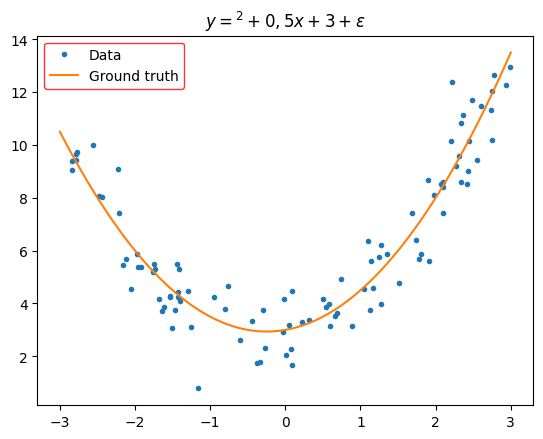

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

def ground_truth(x):
    return np.square(x) + .5 * x + 3

def draw_data(X, y):


    fig, ax = plt.figure(dpi=100), plt.axes()
    ax.plot(X, y, ".", label="Data")

    x= np.linspace(-3, 3, samples)
    ax.plot(x, ground_truth(x), label = "Ground truth")

    ax.set(title=r"$y=^2 + 0,5x + 3 + \epsilon$")
    ax.legend(edgecolor="r")

    return ax

samples = 100


X= np.random.uniform(-3,3,(samples, 1))

y= ground_truth(X)+np.random.randn(samples, 1)

draw_data(X, y)

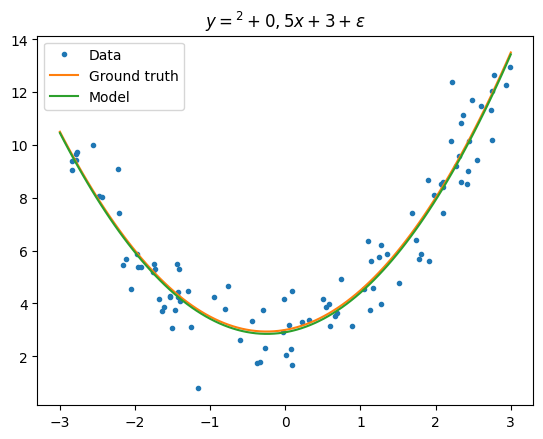

In [10]:
beta_hat = np.polyfit(X.reshape(-1), y, deg=2)
ax = draw_data(X, y)
x = np.linspace(-3, 3, samples)

ax.plot(x, beta_hat[0]*np.square(x) + beta_hat[1]*x + beta_hat[2], label = "Model")
ax.legend()



In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

pol_features = poly.fit_transform(X)
pol_features[:4], X[:4], np.square(X[:4])



(array([[-2.00467231e-02,  4.01871109e-04],
        [ 2.47776214e+00,  6.13930522e+00],
        [-1.74412431e+00,  3.04196961e+00],
        [ 2.06712314e+00,  4.27299808e+00]]),
 array([[-0.02004672],
        [ 2.47776214],
        [-1.74412431],
        [ 2.06712314]]),
 array([[4.01871109e-04],
        [6.13930522e+00],
        [3.04196961e+00],
        [4.27299808e+00]]))

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(pol_features, y)

model.coef_, model.intercept_



(array([[0.49570702, 1.00343479]]), array([2.90973982]))

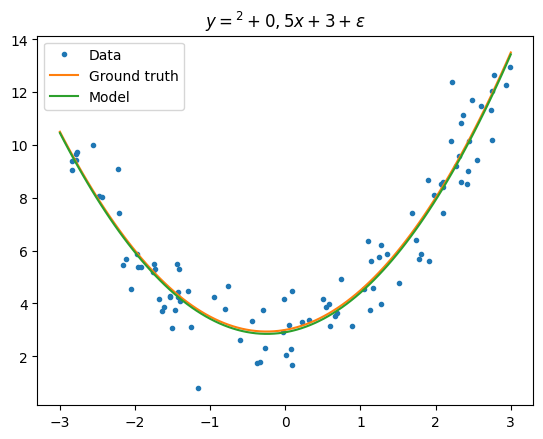

In [18]:
x = np.linspace(-3,3, samples)
x_poly_features = poly.transform(x.reshape(-1,1))
# mer generellt sätt att applicera modellen för polynom
# LinearRegression behöver inte veta vad datan representerar, vi har redan omvandlat den
pred = model.predict(x_poly_features)

ax = draw_data(X, y)
ax.plot(x, pred, label = "Model")
ax.legend()

0.17098187305999313

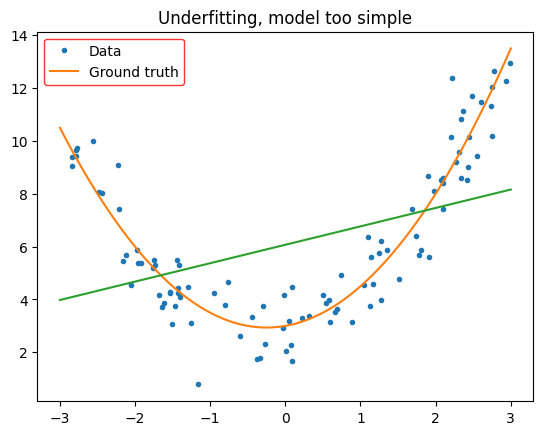

In [20]:
model = LinearRegression()
model.fit(X,y)
ax = draw_data(X, y)
ax.plot(x, model.predict(x.reshape(-1,1)))
ax.set(title="Underfitting, model too simple")
model.score(X, y)

0.9028865668442745

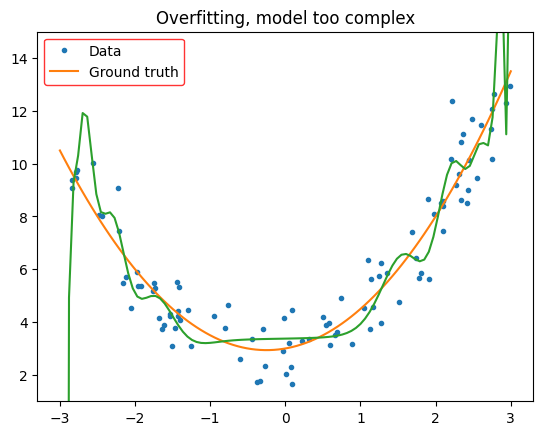

In [25]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)
X_features = poly_model_30.fit_transform(X)

model = LinearRegression()
model.fit(X_features, y)

x_poly_features = poly_model_30.transform(x.reshape(-1, 1))
pred = model.predict(x_poly_features)

ax=draw_data(X, y)

ax.plot(x, pred)
ax.set(title="Overfitting, model too complex", ylim=[1.0, 15.0])

model.score(X_features, y)

En overfit händer när tränings data statistica ser bra ut men test data statstika ser usel ut. Det är när signifikansen och trovärdigheten mellan träning och test skiljer sig för mycket åt. Ett sätt att hitta den bästa model är en grid search eller cross validation.  

För att hitta vad för grad vi ska på en polynomial regression. 

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

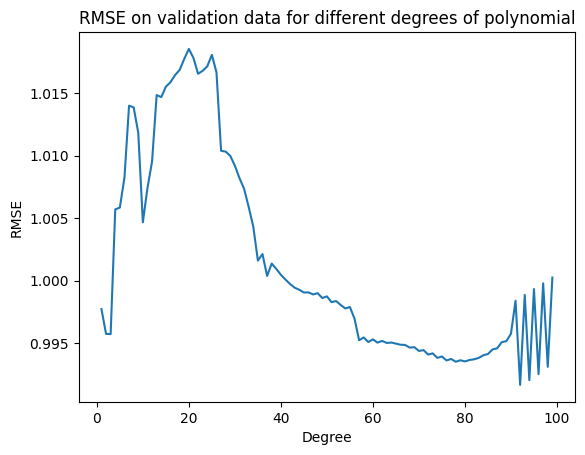

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

np.random.seed(42)

samples = 1000

X = np.random.uniform(-3,3, (samples, 1))

f = lambda x : x**4 + x**2 + 0.5*x + 3

y = f(x) + np.random.randn(samples, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

RMSE_val = []

for degree in range(1, 100):
    model_ply = PolynomialFeatures(degree, include_bias=False)
    train_features = model_ply.fit_transform(X_train)
    val_featerues = model_ply.transform(X_val)
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_featerues)

    RMSE_val.append(root_mean_squared_error(y_val, y_pred_val))

plt.plot(range(1,100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

En enkel model genrelisser bättre än en complex. Så ju mer vi lägger till features, ju sämre förutsäglser får vi och sämmre reulstat i tester på test data. 

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

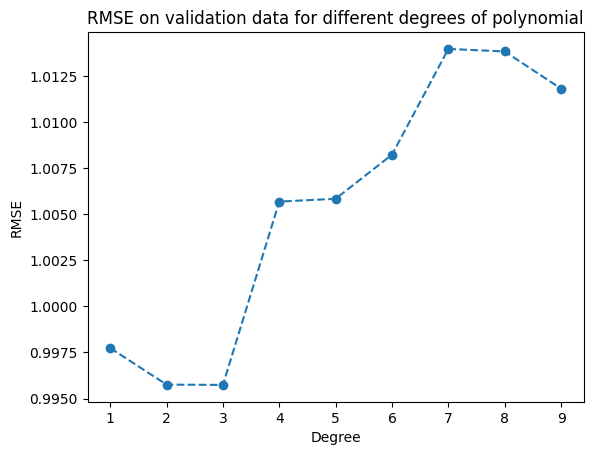

In [27]:
plt.plot(range(1, 10), RMSE_val[:9], "o--")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

Problemet är att vi kör bara från ett stickprov så får vi vad för grad vi ska ha för just det stickprovet. Vi behöver köra från flera stickrov för att få ett medel för RMSE. Polynimella regression får vi större variance för att felen är också polynom. 

I allmänhet letar vi efter ett knä här för vad för grad vi ska ha. Om vi ser att datan är ett polynom. 

Bias är hög är det förenklad model, ger en tendens till underfit. Låg complexitet.

Variancen är hög så är tendensen att få en overfit. Det finns stor variance i värden i data. Låg complexitet.

Det handlar om att hitta en balans mellen Bias och Variance. Det går inte att hitta med hjälp av kod, utan man måste bara ha en känsla för vad som är vettigt. 